In [185]:
import pandas as pd
import numpy as np 
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import plotly
import plotly.express as px

# read the data

In [203]:
topic_df=pd.read_csv('topic_df.csv')
gensim_topic=pd.read_csv('gensim_topic_classifier.csv')
nmf=pd.read_csv('NMF_topic.csv')
nmf

,date,title,content,clean_content,content_nouns,content_verbs,year,topic
0,2009-01-20,First Presidential Inaugural Addre,[Chief Justice John G. \n\t\tRoberts administe...,chief justice john robert administer oath offi...,justice john robert administer oath office bar...,obama preserve stand remain lose fail face pur...,2009,4
1,2009-01-24,>American Rhetoric: Barack Obama: First Presid...,: First Presidential Weekly Address \n(01-24-0...,presidential weekly address barack obama presi...,address barack addressfirst broadcast washingt...,translate lose jumpstart save recognize expect...,2009,1
2,2009-01-26,Al-Arabiya Television Interview With Hisham Me...,"Mr. Melhem:Mr. President, thank you for this o...",melhem opportunity obama melhem sir personal e...,melhem opportunity melhem envoy senator mitche...,obama involve make engage mitchell tell start ...,2009,2
3,2009-02-04,Remarks on Executive Compensation,"Thank you, Tim, for your \n\t\thard work on th...",work issue economic recovery economic crisis f...,work issue recovery crisis face lifetime crisi...,make turn feel congress save spend hear want f...,2009,1
4,2009-02-09,First Presidential Prime Time Press \nConferen,"Good \n\t\tevening, everybody. Please be seate...",good seat question speak state economy recover...,seat question state economy recovery plan moti...,speak elkhart lose sustain lose pay stop spend...,2009,1
...,...,...,...,...,...,...,...,...
423,2017-01-12,Joe Biden Medal of Freedom Presentation Addres,"Welcome to the White House, everybody. As I h...",white house deliver farewell address want folk...,house deliver address pay tribute duration jou...,farewell want devote serve safer devote occur ...,2017,4
424,2017-01-14,Final Weekly Addre,ressBarackObamaFinal Weekly Addressdelivered 1...,ressbarackobamafinal weekly addressdelivered j...,house washington browser support video tag bro...,addressyour grieve regain rebuild build organi...,2017,4
425,2017-01-16,Chicago Cubs MLB 2017 Champions White House Vi...,"They said this day would never come.1,2Here is...",predecessor chance white house series champion...,predecessor chance house series champion guy s...,chicago prefer stand cub leave listen bear sha...,2017,4
426,2017-01-18,Final Presidential Press Conferenc,"Good afternoon, everybody. Let me start \n\t\...",good start sorely tempt wear suit press confer...,start suit press conference fashion sense tell...,hear admit send christi think hold request sol...,2017,2


In [204]:
text=nmf.clean_content.values.tolist()
num_speech=1
words: list[str] = nltk.word_tokenize(text[1])
fd = nltk.FreqDist(words)
lower_fd = nltk.FreqDist([w.lower() for w in fd])

In [205]:
sia = SentimentIntensityAnalyzer()
neg=[]
neu=[]
pos=[]
comp=[]
for i in range(len(text)):
    scores=sia.polarity_scores(text[i])
    neg.append(scores['neg'])
    neu.append(scores['neu'])
    pos.append(scores['pos'])
    comp.append(scores['compound'])
nmf['neg']=neg
nmf['neu']=neu
nmf['pos']=pos
nmf['compound']=comp
nmf['class']="strong_neg"

In [206]:
nmf["class"] = pd.cut(
    x=nmf["compound"],
    bins=[-2, -0.75, -0.2, 0.2, 0.75, 2],
    labels=["strong_neg", "neg", "neu", 'pos', 'strong_pos'],
)

# sentiment analysis chart for all speeches

In [207]:
table=pd.DataFrame(nmf['class'].value_counts())
table

,class
strong_pos,364
strong_neg,59
pos,3
neg,2
neu,0


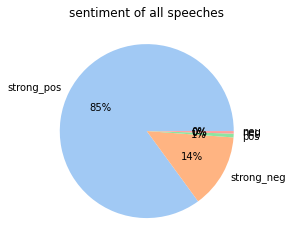

In [213]:
table1=pd.DataFrame(nmf['class'].value_counts())
colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.pie(table1['class'], labels = table1.index, colors = colors, autopct='%.0f%%')
plt.title('sentiment of all speeches')
#sns.barplot(x=table.index, y=table['class'])
plt.show()

# sentiment analysis chart for each topic

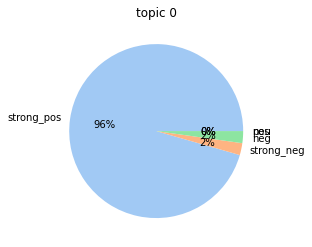

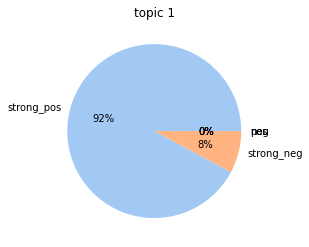

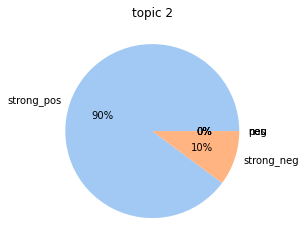

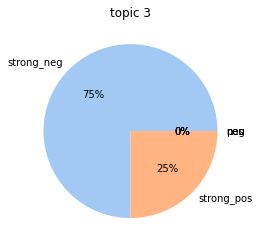

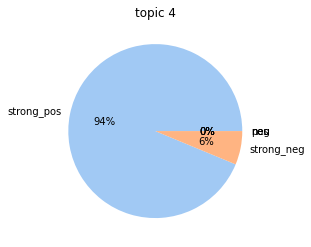

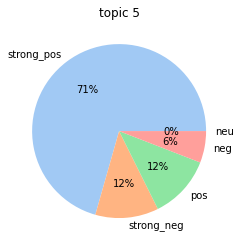

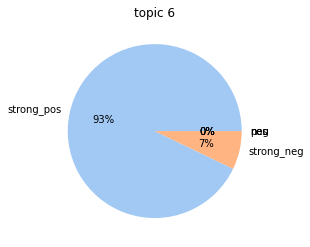

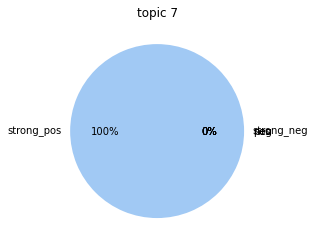

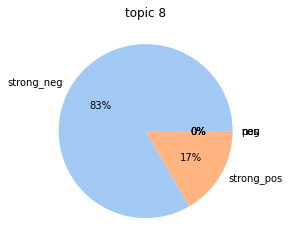

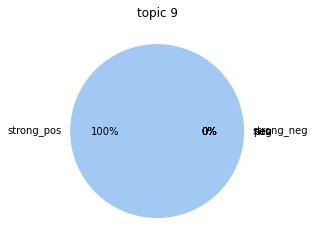

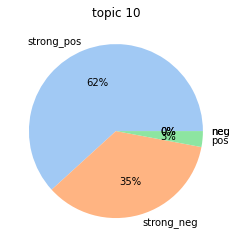

In [208]:
#figure, axis = plt.subplots(2, 3)
#fig, axis = plt.subplots(ncols=3)
for i in range(0, 11):
    topic1=nmf[nmf.topic==i]
    table1=pd.DataFrame(topic1['class'].value_counts())
    colors = sns.color_palette('pastel')[0:5]
#create pie chart
    plt.pie(table1['class'], labels = table1.index, colors = colors, autopct='%.0f%%')
    plt.title('topic '+str(i))
#sns.barplot(x=table.index, y=table['class'])
    plt.show()

In [209]:
topic1=nmf[nmf.topic==0]
t1=pd.DataFrame(topic1['class'].value_counts())
t1['topic1']=t1['class']
topic2=nmf[nmf==1]
t1['topic2']=topic2['class'].value_counts()
topic3=nmf[nmf.topic==2]
t1['topic3']=topic3['class'].value_counts()
topic4=nmf[nmf.topic==3]
t1['topic4']=topic4['class'].value_counts()
topic5=nmf[nmf.topic==4]
t1['topic5']=topic5['class'].value_counts()
topic6=nmf[nmf.topic==5]
t1['topic6']=topic6['class'].value_counts()
topic7=nmf[nmf.topic==6]
t1['topic7']=topic7['class'].value_counts()
topic8=nmf[nmf.topic==7]
t1['topic8']=topic8['class'].value_counts()
topic9=nmf[nmf.topic==8]
t1['topic9']=topic9['class'].value_counts()
topic10=nmf[nmf.topic==9]
t1['topic10']=topic10['class'].value_counts()
topic11=nmf[nmf.topic==10]
t1['topic11']=topic11['class'].value_counts()
t1

,class,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11
strong_pos,43,43,0,53,5,90,12,26,39,2,14,21
strong_neg,1,1,0,6,15,6,2,2,0,10,0,12
neg,1,1,0,0,0,0,1,0,0,0,0,0
neu,0,0,0,0,0,0,0,0,0,0,0,0
pos,0,0,0,0,0,0,2,0,0,0,0,1


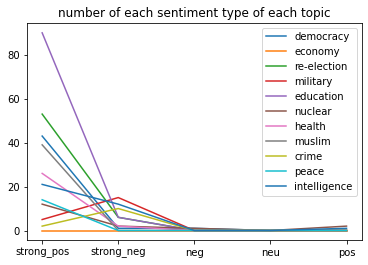

In [214]:
plt.plot(t1.index,t1.topic1, label='democracy' )
plt.plot(t1.index,t1.topic2, label='economy' )
plt.plot(t1.index,t1.topic3, label='re-election' )
plt.plot(t1.index,t1.topic4, label='military' )
plt.plot(t1.index,t1.topic5, label='education' )
plt.plot(t1.index,t1.topic6, label='nuclear' )
plt.plot(t1.index,t1.topic7, label='health' )
plt.plot(t1.index,t1.topic8, label='muslim' )
plt.plot(t1.index,t1.topic9, label='crime' )
plt.plot(t1.index,t1.topic10, label='peace' )
plt.plot(t1.index,t1.topic11, label='intelligence' )
plt.legend()
plt.title('number of each sentiment type of each topic')
plt.show()

# Textblob for all speeches

In [135]:
gensim_topic['polarity'] =gensim_topic.content.apply(lambda x : TextBlob(x).sentiment.polarity)
gensim_topic['subjectivity'] = gensim_topic.content.apply(lambda x : TextBlob(x).sentiment.subjectivity)
gensim_topic.rename(columns={'polarity':'textblob'}, inplace=True)
gensim_topic.head()


,date,title,content,clean_content,content_nouns,content_verbs,year,topic,neg,neu,pos,compound,class,textblob,subjectivity
0,2009-01-20,First Presidential Inaugural Addre,[Chief Justice John G. \n\t\tRoberts administe...,chief justice john robert administer oath offi...,justice john robert administer oath office bar...,obama preserve stand remain lose fail face pur...,2009,3,0.155,0.523,0.321,0.9996,strong_pos,0.079633,0.469166
1,2009-01-24,>American Rhetoric: Barack Obama: First Presid...,: First Presidential Weekly Address \n(01-24-0...,presidential weekly address barack obama presi...,address barack addressfirst broadcast washingt...,translate lose jumpstart save recognize expect...,2009,4,0.125,0.569,0.306,0.9963,strong_pos,0.144367,0.422692
2,2009-01-26,Al-Arabiya Television Interview With Hisham Me...,"Mr. Melhem:Mr. President, thank you for this o...",melhem opportunity obama melhem sir personal e...,melhem opportunity melhem envoy senator mitche...,obama involve make engage mitchell tell start ...,2009,0,0.134,0.617,0.249,0.9980,strong_pos,0.172341,0.516883
3,2009-02-04,Remarks on Executive Compensation,"Thank you, Tim, for your \n\t\thard work on th...",work issue economic recovery economic crisis f...,work issue recovery crisis face lifetime crisi...,make turn feel congress save spend hear want f...,2009,10,0.271,0.487,0.242,-0.9686,strong_neg,0.124183,0.414943
4,2009-02-09,First Presidential Prime Time Press \nConferen,"Good \n\t\tevening, everybody. Please be seate...",good seat question speak state economy recover...,seat question state economy recovery plan moti...,speak elkhart lose sustain lose pay stop spend...,2009,0,0.174,0.621,0.204,0.9970,strong_pos,0.131202,0.463878


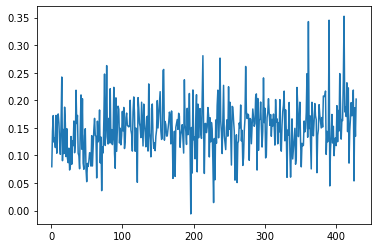

In [141]:
plt.plot(range(1, 429), gensim_topic['textblob'])